# PRIM

In [2]:
import win32com.client
import pandas as pd
import numpy as np
import math

import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.optimize import brentq

from ema_workbench.analysis import prim
from ema_workbench import load_results

In [3]:
results = load_results('250 scenarios 4 policies.tar.gz')

experiments, outcomes = results

outcomes['car_total'] = outcomes['carshare_km'] * outcomes['totaal_km']
a = outcomes['car_total']
a.sort()
per10 = a[900]

In [4]:
results = load_results('250 scenarios 4 policies.tar.gz')

experiments, outcomes = results

In [5]:
from ema_workbench.analysis import prim

x = experiments
outcomes['car_total'] = outcomes['carshare_km'] * outcomes['totaal_km']
y = outcomes['car_total'] > per10
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

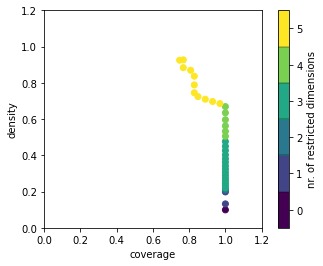

In [6]:
box1.show_tradeoff()
plt.show()

coverage    0.767677
density     0.926829
id                35
mass           0.082
mean        0.926829
res_dim            5
Name: 35, dtype: object

                              box 35                     \
                                 min                max   
KMKOSTENINDEX               0.700769           0.767069   
EBIKE_BASIS                 0.220196           0.271992   
policy             {basecase, 30 km}  {basecase, 30 km}   
THUISWERKREDUCTIE           0.858118           0.999305   
OVKOSTENINDEX                1.00149            1.19985   

                                                   
                                        qp values  
KMKOSTENINDEX      [-1.0, 4.0866264545464785e-33]  
EBIKE_BASIS           [-1.0, 0.09954243227538448]  
policy             [3.6784842574624236e-19, -1.0]  
THUISWERKREDUCTIE  [2.2948587436952955e-07, -1.0]  
OVKOSTENINDEX          [0.3255455474401041, -1.0]  



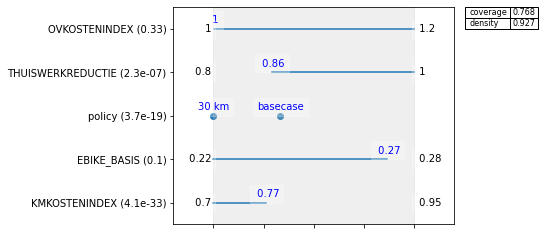

In [16]:
box1.inspect(35)
box1.inspect(35, style='graph')
plt.show()

policy ['basecase', '30 km', 'parkeren', 'fiets']


C:\Users\nlilbm\Anaconda3\lib\site-packages\ema_workbench\analysis\scenario_discovery_util.py:404: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


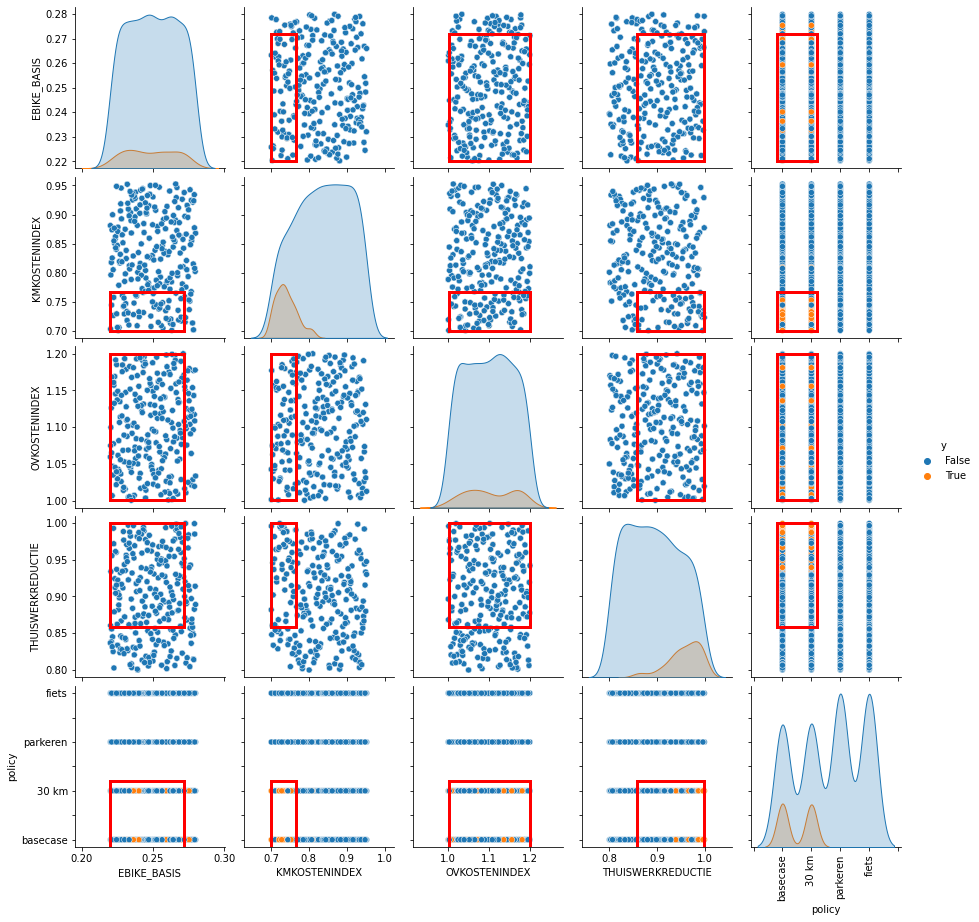

In [17]:
box1.show_pairs_scatter(35)
plt.show()

# PRIM worst base case

In [32]:
results = load_results('250 scenarios 4 policies.tar.gz')

experiments, outcomes = results

outcomes['car_total'] = outcomes['carshare_km'] * outcomes['totaal_km']
a = outcomes['car_total'][:250]
a.sort()
per10 = a[225]

In [33]:
results = load_results('250 scenarios 4 policies.tar.gz')

experiments, outcomes = results
outcomes['car_total'] = outcomes['carshare_km'] * outcomes['totaal_km']

In [20]:
a = outcomes['car_total'][:250]

In [21]:
from ema_workbench.analysis import prim

x = experiments.drop(['model_file','policy'], axis=1).iloc[:250,:]
y = a > per10
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

x = experiments.drop(['model_file','policy'], axis=1).iloc[:250,:]
outcomes['car_total'] = outcomes['carshare_km'] * outcomes['totaal_km']
y = outcomes
for i in y.keys():
    y[i] = y[i][:250]

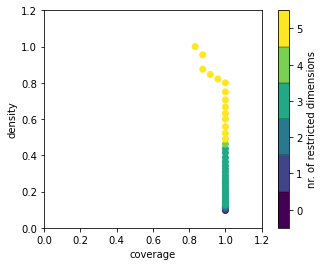

In [22]:
box1.show_tradeoff()
plt.show()

coverage    0.875
density     0.875
id             40
mass        0.096
mean        0.875
res_dim         5
Name: 40, dtype: object

                     box 40            \
                        min       max   
KMKOSTENINDEX      0.700769  0.753218   
OVKOSTENINDEX      1.000758  1.186584   
THUISWERKREDUCTIE  0.932468  0.999305   
EBIKE_BASIS        0.222244  0.270703   
EBIKE_OW           0.091142  0.108980   

                                                             
                                                  qp values  
KMKOSTENINDEX                [-1.0, 1.9727269972390847e-07]  
OVKOSTENINDEX                    [-1.0, 0.6475648632839055]  
THUISWERKREDUCTIE            [0.00013858079910278328, -1.0]  
EBIKE_BASIS        [0.6475648632839055, 0.4836468205295562]  
EBIKE_OW           [0.6475648632839055, 0.6475648632839055]  



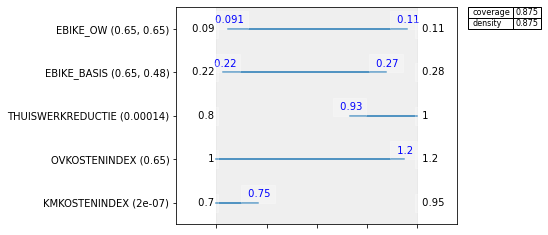

In [24]:
box1.inspect(40)
box1.inspect(40, style='graph')
plt.show()

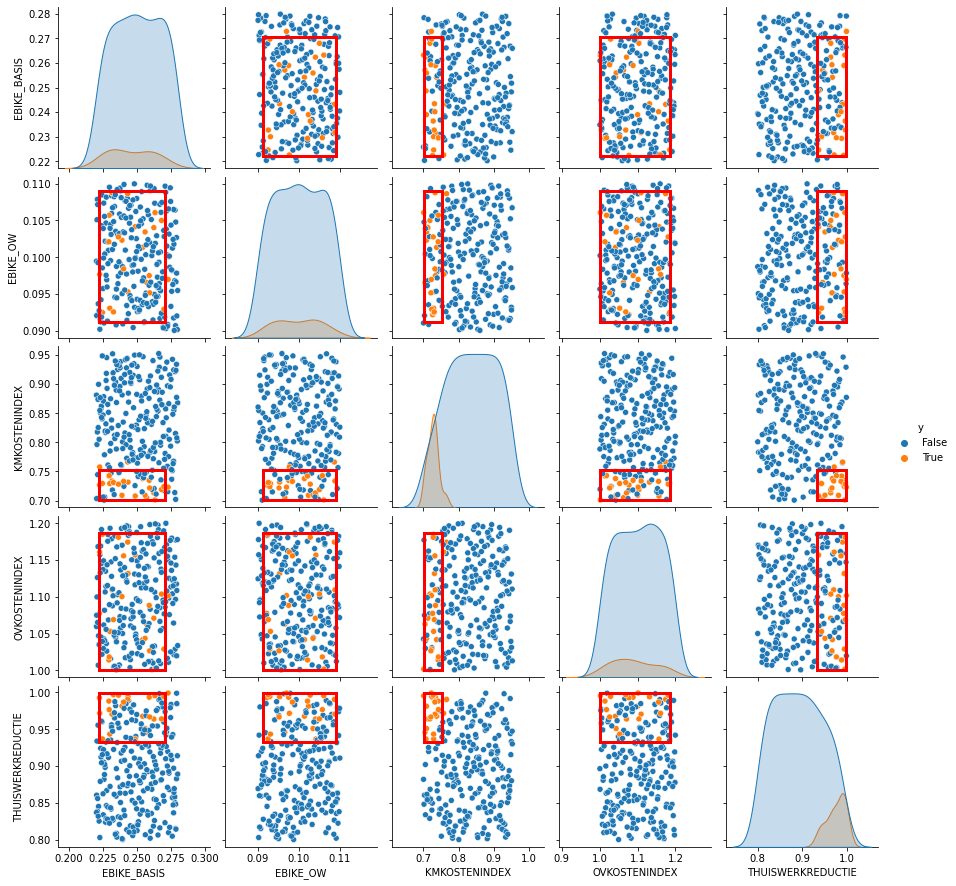

In [25]:
box1.show_pairs_scatter(40)
plt.show()

# 10 % best perfroming scenarios in with policies

In [26]:
results = load_results('250 scenarios 4 policies.tar.gz')

experiments, outcomes = results
outcomes['car_total'] = outcomes['carshare_km'] * outcomes['totaal_km']

a = outcomes['car_total']
a.sort()
per10 = a[100]

In [27]:
results = load_results('250 scenarios 4 policies.tar.gz')

experiments, outcomes = results
outcomes['car_total'] = outcomes['carshare_km'] * outcomes['totaal_km']

In [28]:
from ema_workbench.analysis import prim

x = experiments
y = outcomes['car_total'] < per10
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

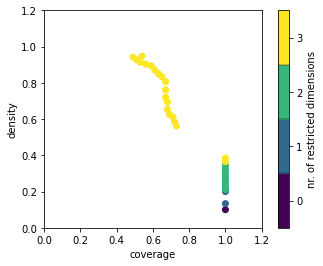

In [29]:
box1.show_tradeoff()
plt.show()

coverage        0.65
density     0.833333
id                24
mass           0.078
mean        0.833333
res_dim            3
Name: 24, dtype: object

                     box 24                                          
                        min       max                       qp values
THUISWERKREDUCTIE  0.800009  0.945734   [-1.0, 0.0020953985497535795]
policy              {fiets}   {fiets}   [8.591446125975478e-23, -1.0]
KMKOSTENINDEX       0.85083  0.952395  [2.1280477908191905e-16, -1.0]



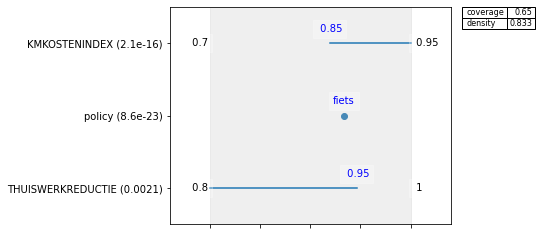

In [30]:
box1.inspect(24)
box1.inspect(24, style='graph')
plt.show()

policy ['fiets', 'basecase', 'parkeren', '30 km']


C:\Users\nlilbm\Anaconda3\lib\site-packages\ema_workbench\analysis\scenario_discovery_util.py:404: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


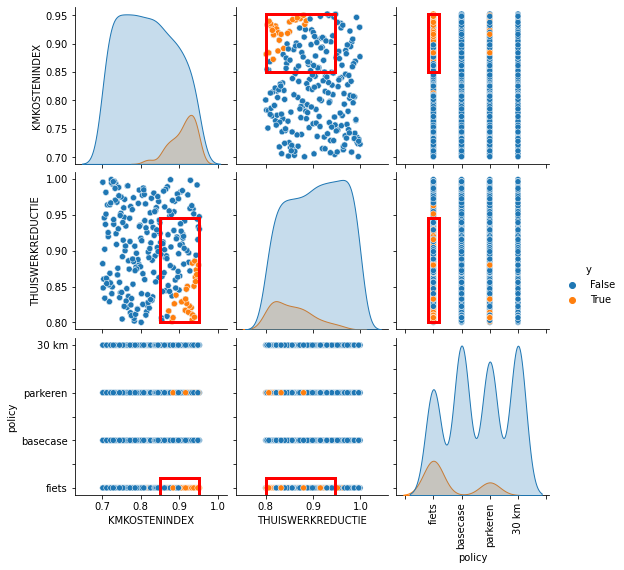

In [31]:
box1.show_pairs_scatter(24)
plt.show()

# 10 % best performing in the base case

In [40]:
results = load_results('250 scenarios 4 policies.tar.gz')

experiments, outcomes = results
outcomes['car_total'] = outcomes['carshare_km'] * outcomes['totaal_km']

a = outcomes['car_total'][:250]
a.sort()
per10 = a[25]

In [41]:
results = load_results('250 scenarios 4 policies.tar.gz')

experiments, outcomes = results
outcomes['car_total'] = outcomes['carshare_km'] * outcomes['totaal_km']

In [42]:
a = outcomes['car_total'][:250]

In [43]:
from ema_workbench.analysis import prim

x = experiments.drop(['model_file','policy'], axis=1).iloc[:250,:]
y = a < per10
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

x = experiments.drop(['model_file','policy'], axis=1).iloc[:250,:]
y = outcomes
for i in y.keys():
    y[i] = y[i][:250]

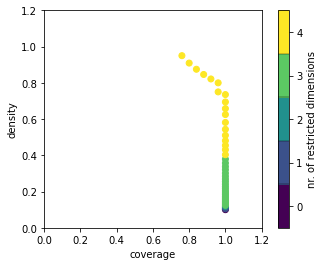

In [45]:
box1.show_tradeoff()
plt.show()

coverage    0.76
density     0.95
id            42
mass        0.08
mean        0.95
res_dim        4
Name: 42, dtype: object

                     box 42            \
                        min       max   
THUISWERKREDUCTIE  0.800009  0.863896   
KMKOSTENINDEX      0.878316  0.952395   
EBIKE_BASIS        0.225917  0.279907   
EBIKE_OW           0.093539  0.109061   

                                                               
                                                    qp values  
THUISWERKREDUCTIE               [-1.0, 4.775443692054188e-07]  
KMKOSTENINDEX                   [2.278814984958186e-08, -1.0]  
EBIKE_BASIS                       [0.41955078215339825, -1.0]  
EBIKE_OW           [0.44593088407243087, 0.22156027368887396]  



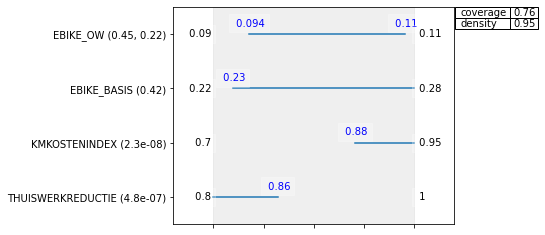

In [48]:
box1.inspect()
box1.inspect(42, style='graph')
plt.show()

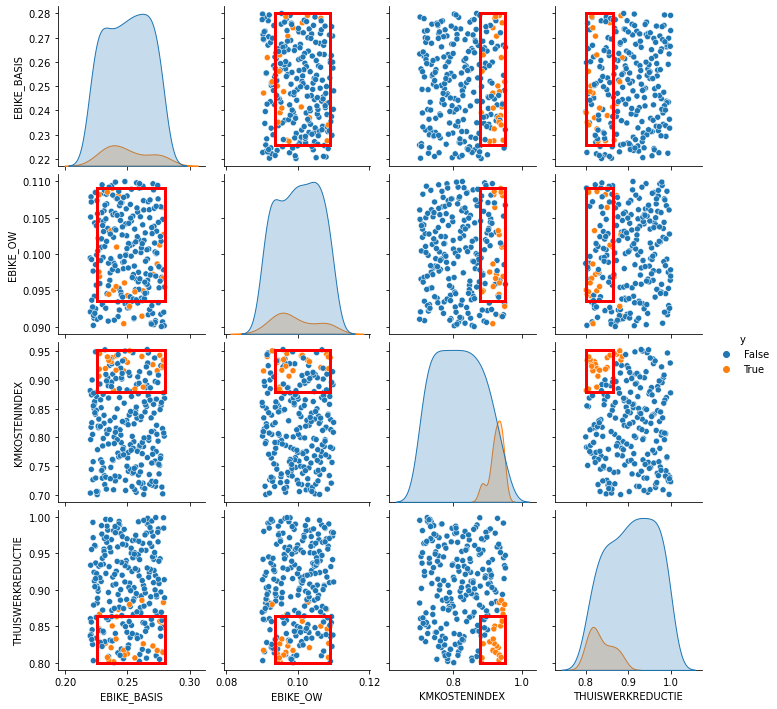

In [49]:
box1.show_pairs_scatter(42)
plt.show()